In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import model_selection

##**1 - Business Problem**

Prepare a classification model using Naive Bayes for salary data___

##2 - Data collection and description


In [2]:
test_tmp = pd.read_csv("/content/SalaryData_Test.csv")
train_tmp = pd.read_csv("/content/SalaryData_Train.csv")

In [3]:
df_tmp = test_tmp.append(train_tmp)
test = test_tmp.copy()
train = train_tmp.copy()

<ipython-input-3-f0d2db7b03fd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tmp = test_tmp.append(train_tmp)


In [4]:
test.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [7]:
number = LabelEncoder()


In [8]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [9]:
test.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [10]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,2,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,1,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,2,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,1,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,6,2,0,0.0,0.0,40.0,4,<=50K


In [11]:
mapping = {' >50K': 1, ' <=50K': 2}

In [12]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [13]:
df = train.append(test)

<ipython-input-13-c75fa8e72363>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [14]:
df1 = df.copy()


In [15]:
df1.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,2,4,1,2174.0,0.0,40.0,37,2.0
1,50,4,9,13,2,3,1,4,1,0.0,0.0,13.0,37,2.0
2,38,2,11,9,0,5,2,4,1,0.0,0.0,40.0,37,2.0
3,53,2,1,7,2,5,1,2,1,0.0,0.0,40.0,37,2.0
4,28,2,9,13,2,9,6,2,0,0.0,0.0,40.0,4,2.0


In [16]:
df1.shape

(33827, 14)

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,33827.0,38.615514,13.269769,17.0,28.0,37.0,47.0,90.0
workclass,33827.0,2.206344,0.961103,0.0,2.0,2.0,2.0,6.0
education,33827.0,10.309782,3.809640,0.0,9.0,11.0,12.0,15.0
educationno,33827.0,10.119904,2.544023,1.0,9.0,10.0,13.0,16.0
maritalstatus,33827.0,2.587814,1.503714,0.0,2.0,2.0,4.0,6.0
occupation,33827.0,5.974783,4.034549,0.0,2.0,6.0,9.0,13.0
relationship,33827.0,1.968309,1.674973,0.0,1.0,1.0,3.0,6.0
race,33827.0,3.682680,0.829450,0.0,4.0,4.0,4.0,5.0
sex,33827.0,0.674432,0.468657,0.0,0.0,1.0,1.0,2.0
capitalgain,33826.0,1095.214243,7516.111588,0.0,0.0,0.0,0.0,99999.0


In [18]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           0
Salary           1
dtype: int64

##**Finding Correlation**

In [19]:
corr=df1.corr()

<AxesSubplot:>

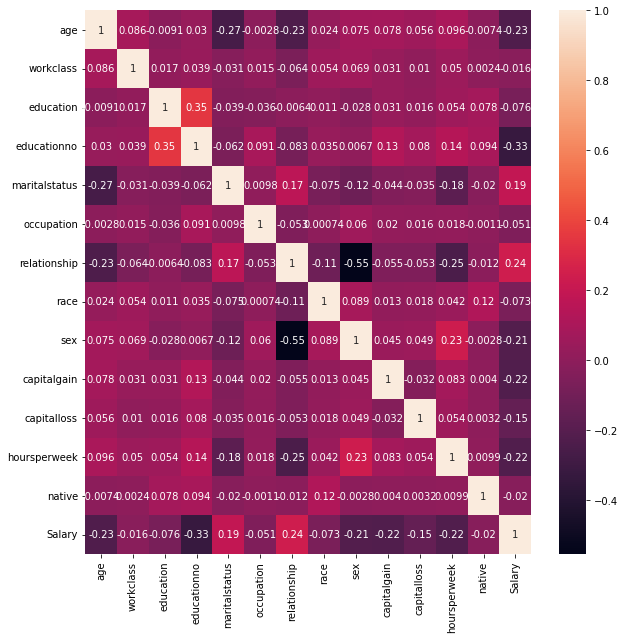

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [21]:
plt.rcParams["figure.figsize"] = 9,5

In [31]:
df1.reset_index(level=0, inplace=True)

In [32]:
df1.index.is_unique

True

Skew: -0.2995362849529499
Kurtosis: 0.6111937628772424


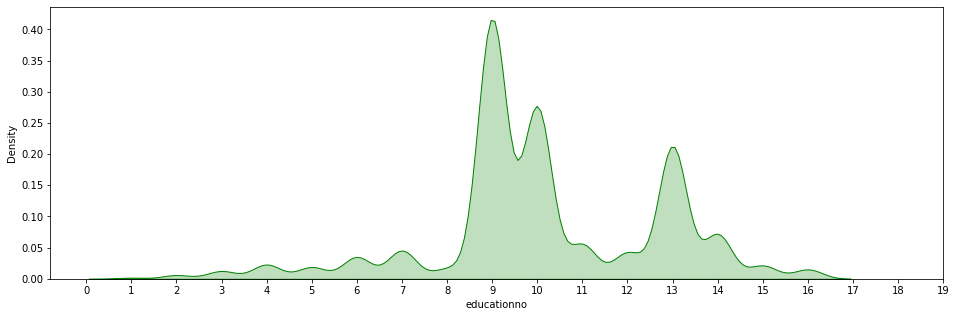

In [33]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

###The Data is negatively skewed and has low kurtosis value

###Most of people have eduction Number of years of education 8 - 11

In [48]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()


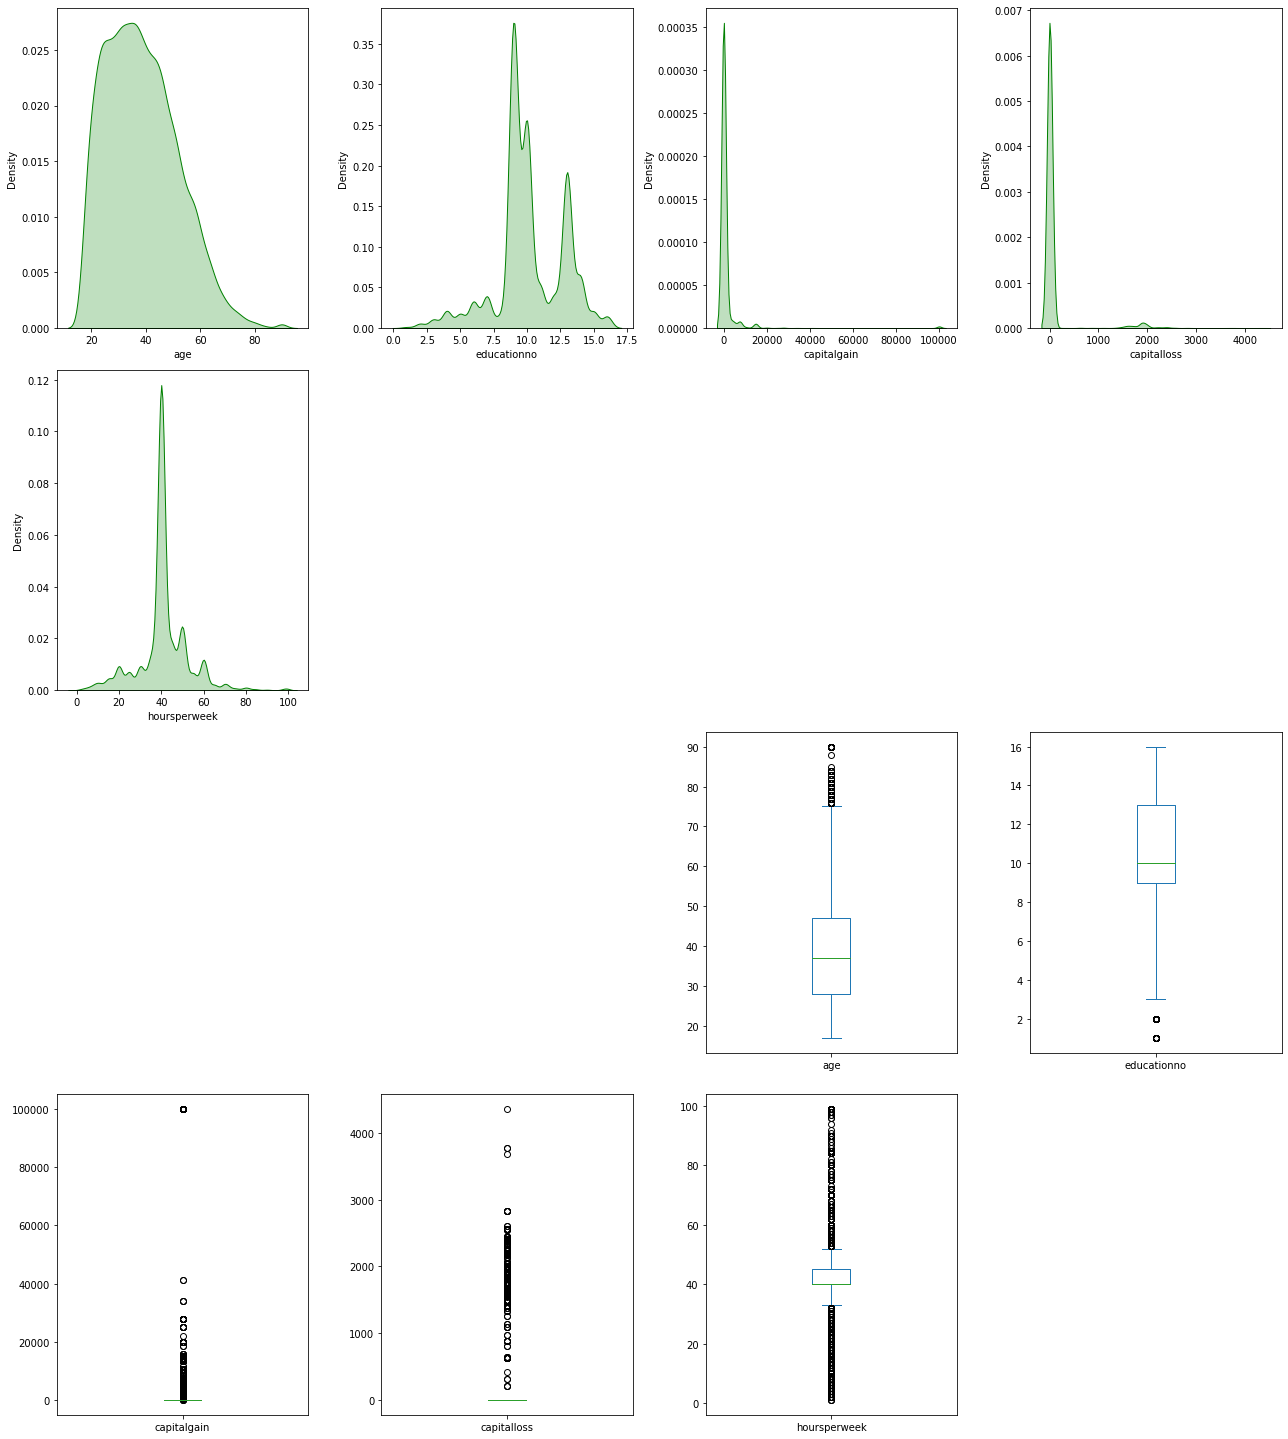

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.549736,-0.281631,11.984787,4.497750,0.315850
kurtosis,-0.091166,0.604456,155.697204,19.237711,3.140353


In [49]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

##**3 - Naive Bayes**

In [50]:
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

In [113]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,2,4,1,2174.0,0.0,40.0,37
1,50,4,9,13,2,3,1,4,1,0.0,0.0,13.0,37
2,38,2,11,9,0,5,2,4,1,0.0,0.0,40.0,37
3,53,2,1,7,2,5,1,2,1,0.0,0.0,40.0,37
4,28,2,9,13,2,9,6,2,0,0.0,0.0,40.0,4


In [81]:
y_train

,index,Salary
0,0,2.0
1,1,2.0
2,2,2.0
3,3,2.0
4,4,2.0
...,...,...
18762,18762,2.0
18763,18763,2.0
18764,18764,1.0
18765,18765,2.0


In [98]:
y_train.isnull().any()

index     False
Salary     True
dtype: bool

In [105]:
y_train.dropna()

,index,Salary
0,-0.230666,1.083954
1,0.496100,1.083954
2,0.536709,1.083954
3,-0.090745,1.083954
4,-0.930850,1.083954
...,...,...
18761,-0.767024,1.083954
18762,0.151641,1.083954
18763,0.578525,1.083954
18764,0.377186,1.037094


##3.1 - GaussianNB


In [117]:
clsfrgnb = GaussianNB()

In [118]:
clsfrgnb.fit(x_test,y_test)

GaussianNB()

In [119]:
y_pred_gnb = clsfrgnb.predict(x_test)

In [120]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 1184,  2516],
       [  583, 10777]])

In [121]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3700
2,11360


In [122]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))


Accuracy 0.7942231075697211


###3.2 - MultinomialNB

In [123]:
clsfrmnb = MultinomialNB()


In [125]:
clsfrmnb.fit(x_test,y_test)


MultinomialNB()

In [126]:
y_pred_mnb = clsfrmnb.predict(x_test)


In [127]:
confusion_matrix(y_test, y_pred_mnb)


array([[  780,  2920],
       [  469, 10891]])

In [128]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)


col_0,MultinomialNB()
row_0,
1,3700
2,11360


In [129]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))


Accuracy 0.7749667994687915


##4 - Conclusion & Cross Validation


GaussianNB Model has a better Accuracy, Thus we will use GaussianNB Classifier


We will also cross validate the model with other classifiers to get better understanding of which classifier is best suited for our data

In [130]:
seed = 7

In [131]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [132]:
results = []
names = []
scoring = 'accuracy'


In [140]:
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, x_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.799270 (0.010368)
LDA: 0.809230 (0.008729)
KNN: 0.829681 (0.008008)
CART: 0.801793 (0.005581)
NB: 0.793758 (0.008252)


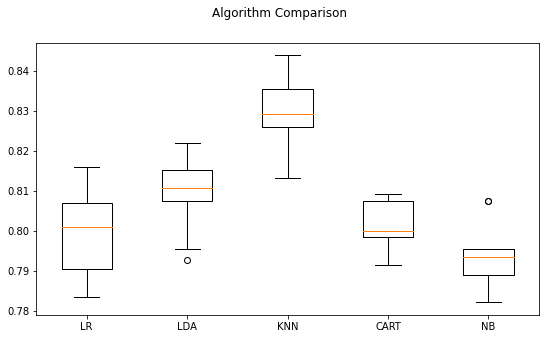

In [141]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###In comparision KNN has the best Accuracy
